#  Principal Component Analysis (PCA)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## PCA on two-dimensional (2D) data
It will be easy to show what PCA does by using a 2D dataset.
Consider the following 200 points:

Text(0.5, 1.0, '200 data points in 2D space')

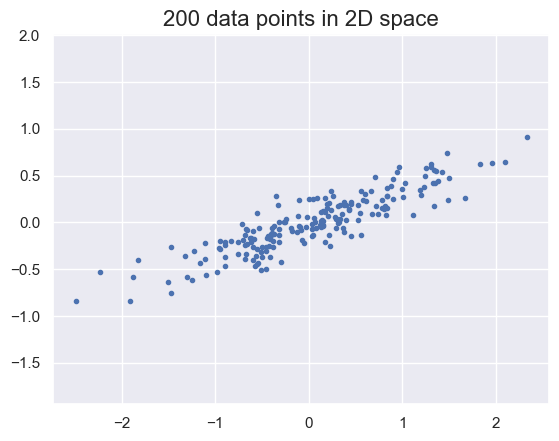

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1],'.')
ax.axis('equal')
ax.set_title('200 data points in 2D space', fontsize=16)
#each row of X is a data point

In [3]:
print(X)

[[-6.25301618e-01 -1.70063657e-01]
 [ 9.60695033e-01  5.90900597e-01]
 [-5.98543385e-01 -4.02593393e-01]
 [-2.22805938e+00 -5.32576740e-01]
 [-4.61430060e-01 -4.98867244e-01]
 [-9.58929028e-01 -2.69331024e-01]
 [-6.73079909e-01 -3.38308547e-01]
 [ 1.30501861e+00  5.91357846e-01]
 [ 3.74545597e-01 -9.85442049e-02]
 [-1.82628627e+00 -4.06170254e-01]
 [ 6.68262284e-01  3.36877396e-01]
 [-5.82646676e-01 -1.77369217e-01]
 [-4.18128976e-01 -3.73811389e-01]
 [ 1.72209371e-01  2.64668836e-01]
 [ 3.77116687e-01  1.88442969e-01]
 [-6.79396230e-01 -1.31601978e-01]
 [ 1.03148960e+00  4.25550018e-01]
 [ 3.36041799e-01  3.90982721e-02]
 [ 7.05745985e-01  4.88730649e-01]
 [ 8.39511547e-01  1.52125872e-01]
 [ 1.49882898e+00  4.71380809e-01]
 [ 2.88356638e-01  3.31334714e-02]
 [-5.02935011e-01 -3.68665426e-01]
 [ 1.47921067e+00  7.40445724e-01]
 [-4.44382429e-01 -1.65019364e-01]
 [-5.33464228e-01 -6.02221911e-02]
 [-6.16229422e-01 -2.11783922e-01]
 [ 7.46598965e-02 -6.14321077e-02]
 [-1.13637011e-01  7

It seems that the data points are spread out along a principal direction. <br>
What is that principal direction/axis ? <br>
Now, let's use Scikit-Learn's ``PCA`` to find out ...

In [4]:
from sklearn.decomposition import PCA
model = PCA(n_components=2, whiten=False) # K = M
model.fit(X)

PCA(n_components=2)

The line `model.fit(X)` hides all of the details of the algorithm <br>
It basically follows the three algorithm-steps: <br>
(1) Estimate the mean 𝜇 and covariance matrix C <br>
(2) Compute the eigenvectors 𝑤0, 𝑤1,…, of 𝐶, corresponding to the largest eigenvalues 𝜆0, the second largest 𝜆1,… <br>
(3) Compute the reduced representation of data

There are many attributes of pca <br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html  <br>
For example, `model.explained_variance_` - what does it mean ? 

`model.mean_` stores the sample mean 𝜇 

In [5]:
model.mean_ 

array([ 0.03351168, -0.00408072])

`model.get_covariance()` returns the covariance matrix C <br>

In [6]:
C=model.get_covariance()
C

array([[0.68217761, 0.23093475],
       [0.23093475, 0.09883179]])

In [7]:
from numpy.linalg import eig
eigenvalues, eigenvectors = eig(C) 

In [8]:
print(eigenvalues)

[0.7625315 0.0184779]


In [9]:
# a column is an eigenvector
print(eigenvectors)

[[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]


`model.components_` stores the eigenvectors <br>
shape (n_components, n_features)

In [10]:
#a row is an eigenvector
model.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

`model.explained_variance_` stores the eigenvalues of the covariance matrix C<br>
shape (n_components,)

In [11]:
model.explained_variance_

array([0.7625315, 0.0184779])

`model.singular_values_` stores the singular values of X from SVD

In [12]:
model.singular_values_

array([12.31843207,  1.91757691])

In [13]:
from numpy.linalg import svd
U, S, V = svd(X)
print(V)

[[ 0.94465994  0.3280512 ]
 [ 0.3280512  -0.94465994]]


Relationship between `model.singular_values_` and `model.explained_variance_` <br>
see "Singular Value Decomposition (SVD) and Eigen Decomposition" in lecture notes

In [14]:
model.explained_variance_*X.shape[0] # X.shape[0] is the number of data points

array([152.50630018,   3.6955791 ])

In [15]:
model.singular_values_**2

array([151.74376868,   3.67710121])

To 'see' what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

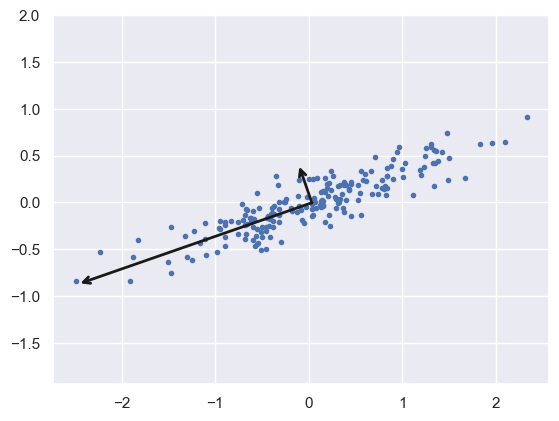

In [16]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, color ='k',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.plot(X[:, 0], X[:, 1], '.')
for length, vector in zip(model.explained_variance_, model.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(model.mean_, model.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes/directions* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data. <br>
We use `model.transform(X)` to compute the principal components of each data point

model=PCA(K, whiten) <br>
Output=model(X) <br>
If PCA parameter `whiten=True`, and then `model.transform(X)` is Y in lecture notes, y_n=Y[n,:] for x_n<br>
If PCA parameter `whiten=False`, and then `model.transform(X)` is Beta in lecture notes, Beta_n=Beta[n,:] for x_n <br>

In [17]:
#whiten=False when we create the pca model
Beta = model.transform(X)

In [18]:
n=0
x_n=X[n,:]
Beta[n,:] # Beta_n of the data point x_n (X[n,:])
# Beta_n = [Beta_n_0, Beta_n_1] because we set K=2 

array([0.67676923, 0.0597386 ])

In [19]:
#compute Beta_n_0 using the equation
w0=model.components_[0,:]
mu=model.mean_
np.sum(w0*(x_n-mu))

0.676769234922681

In [20]:
#compute Beta_n_1 using the equation
w1=model.components_[1,:]
mu=model.mean_
np.sum(w1*(x_n-mu))

0.05973860147978344

In [21]:
Y = Beta/ np.sqrt(model.explained_variance_)

In [22]:
n=0
x_n=X[n,:]
Y[n,:] # y_n of the data point x_n (X[n,:])
# y_n = [y_n_0, y_n_1] because we set K=2 

array([0.77501786, 0.43946956])

In [23]:
#compute y_n_0 using the equation
w0=model.components_[0,:]
lamda0=model.explained_variance_[0]
mu=model.mean_
np.sum(w0*(x_n-mu))/np.sqrt(lamda0)

0.7750178644142619

In [24]:
#compute y_n_1 using the equation
w1=model.components_[1,:]
lamda1=model.explained_variance_[1]
mu=model.mean_
np.sum(w1*(x_n-mu))/np.sqrt(lamda1)

0.4394695588535655

Now, we can show the original data points X and the transformed data points Y

Text(0.5, 1.0, 'transformed data Y - principal components of X')

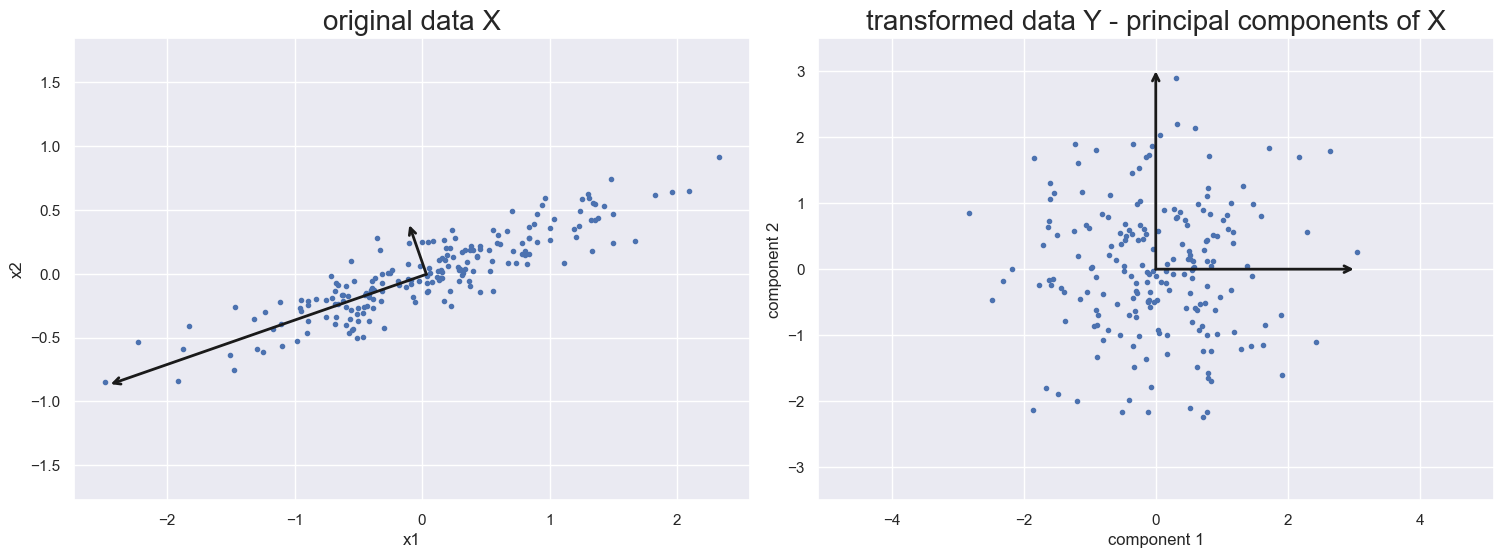

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# plot data
ax[0].plot(X[:, 0], X[:, 1], '.')
for length, vector in zip(model.explained_variance_, model.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(model.mean_, model.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x1', ylabel='x2')
ax[0].set_title('original data X', fontsize=20)
# plot principal components
ax[1].plot(Y[:, 0], Y[:, 1], '.')
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          xlim=(-3.5, 3.5), ylim=(-3.5, 3.5))
ax[1].set_title('transformed data Y - principal components of X', fontsize=20)

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

Thus, PCA is a linear transform

#### Let's  set `whiten=True` to directly get y

In [26]:
model_w = PCA(n_components=2, whiten=True)
model_w.fit(X)
Y_w = model_w.transform(X) # Y_w[0,:] is y0 in lecture notes

In [27]:
Y[0,:]

array([0.77501786, 0.43946956])

In [28]:
Y_w[0,:]

array([0.77501786, 0.43946956])

In [29]:
Y[1,:]

array([-1.22672528,  1.89239746])

In [30]:
Y_w[1,:]

array([-1.22672528,  1.89239746])

In [31]:
#this is weird, not the original covariance matrix
#see the code https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/decomposition/_base.py#L26
C_w=model_w.get_covariance()
C_w

array([[0.51869714, 0.18036221],
       [0.18036221, 0.06309858]])

In [32]:
C

array([[0.68217761, 0.23093475],
       [0.23093475, 0.09883179]])

### PCA as dimensionality reduction

The data X is in 2D space, i.e., each row is a data point that has two numbers <br>
The transformed data Y is still in 2D space. <br>
Now, we only select the first principal component for each data point <br>

In [33]:
Y0 = Y[:,0].reshape(-1,1)
print("original shape:   ", X.shape)
print("transformed shape:", Y0.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


We can start from the beginning by setting n_components to 1 

In [34]:
pca1 = PCA(n_components=1, whiten=True)#set whiten=True, we get y from the pca (forward) transform
pca1.fit(X)
Y1d = pca1.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", Y1d.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data `Y1d` to obtain a reconstructed version `X_rec` of the original data `X`

(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389315,
 1.0060642308539953)

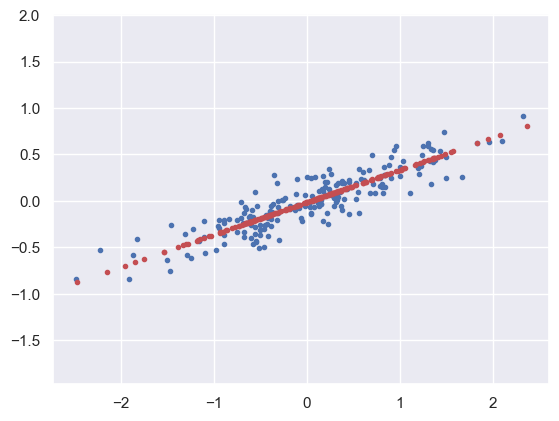

In [35]:
X_rec = pca1.inverse_transform(Y1d)
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'b.')
ax.plot(X_rec[:, 0], X_rec[:, 1], 'r.')
ax.axis('equal')

The blue points are the original data, while the red points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: the overall relationship between the data points are mostly preserved.